In [1]:
import pandas as pd
import numpy as np

In [2]:
datas = pd.read_csv("netflix.csv")

In [3]:
datas.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2002-05-23,1.242857,1.145714,1.156429,1.196429,104790000.0,1.196429
1,2002-05-24,1.225000,1.197143,1.214286,1.210000,11104800.0,1.210000
2,2002-05-28,1.232143,1.157143,1.213571,1.157143,6609400.0,1.157143
3,2002-05-29,1.164286,1.085714,1.164286,1.103571,6757800.0,1.103571
4,2002-05-30,1.107857,1.071429,1.107857,1.071429,10154200.0,1.071429


In [5]:
datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4881 entries, 0 to 4880
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4881 non-null   object 
 1   High       4881 non-null   float64
 2   Low        4881 non-null   float64
 3   Open       4881 non-null   float64
 4   Close      4881 non-null   float64
 5   Volume     4881 non-null   float64
 6   Adj Close  4881 non-null   float64
dtypes: float64(6), object(1)
memory usage: 267.1+ KB


In [8]:
datas['Date'] = pd.to_datetime(datas['Date'])

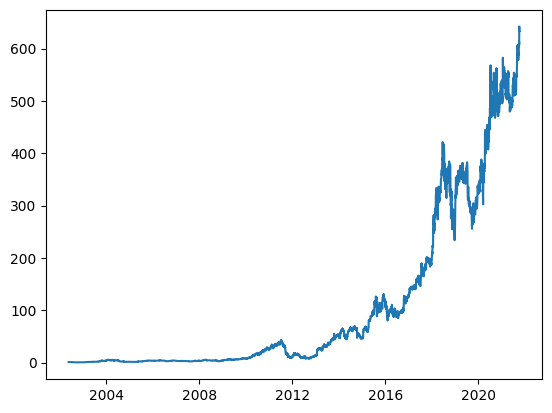

In [10]:
import matplotlib.pyplot as plt
plt.plot(datas['Date'], datas['Open'])

In [17]:
trainData = datas.iloc[4000:, [0, 3]]

In [18]:
trainData

,Date,Open
4000,2018-04-13,317.290009
4001,2018-04-16,315.989990
4002,2018-04-17,329.660004
4003,2018-04-18,336.299988
4004,2018-04-19,332.880005
...,...,...
4876,2021-10-05,606.940002
4877,2021-10-06,628.179993
4878,2021-10-07,642.229980
4879,2021-10-08,634.169983


In [20]:
trainData['Date'] = trainData['Date'].rank(method='first').astype(int)

In [21]:
trainData

,Date,Open
4000,1,317.290009
4001,2,315.989990
4002,3,329.660004
4003,4,336.299988
4004,5,332.880005
...,...,...
4876,877,606.940002
4877,878,628.179993
4878,879,642.229980
4879,880,634.169983


In [22]:
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(n_neighbors=10)
model.fit(trainData)

NearestNeighbors(n_neighbors=10)

In [23]:
distance, index = model.kneighbors()

In [26]:
distance

array([[ 1.64013646,  7.26118942, 10.05393544, ..., 13.53686423,
        13.85731653, 14.17073623],
       [ 1.64013646,  6.81417427,  9.00375505, ..., 12.76070406,
        13.43726008, 13.70654103],
       [ 3.79056828,  3.94380368,  4.03238267, ..., 15.46407687,
        15.61499914, 15.96336763],
       ...,
       [ 8.12179541,  9.24880137, 14.08553006, ..., 40.97289712,
        43.7582968 , 47.22492197],
       [ 1.39314147,  6.31506002,  8.12179541, ..., 34.76047578,
        37.46873676, 40.35292135],
       [ 1.39314147,  5.84812757,  9.24880137, ..., 34.61928825,
        37.29622957, 39.99046434]])

In [27]:
meanDistance = np.mean(distance, axis=1)

In [28]:
meanDistance

array([11.05609873, 10.27556536, 10.33367989, 12.8537114 , 10.34734215,
        9.73337559,  9.15041049,  8.56811553,  8.66889783,  6.24900242,
        6.93688604,  5.66696709,  5.89987651,  5.89199245,  6.41219173,
        8.05013955,  7.92054018,  5.74071257,  5.14037769,  6.04925122,
        4.63713153,  3.86412747,  3.97996507,  3.88284827,  4.0521127 ,
        5.24831277,  4.94953485,  8.30877108,  6.43228588, 11.89924257,
        9.35858624,  8.20133688,  7.55617785,  7.07710359,  7.07537372,
        6.77061211,  6.52810175,  8.36011329,  8.80823235,  7.51047059,
        6.79373596,  7.35982181,  9.39683276, 12.306749  ,  9.81833318,
        9.88131795,  8.83539595, 12.07124246, 13.82488633, 12.48756239,
       10.10640018,  7.3560114 ,  9.88825277,  7.16796106,  7.45743047,
       10.94341092,  7.38157897,  8.13418789,  7.85871127,  9.47624935,
       10.30897884,  9.43229012, 10.49629302,  9.87470118, 11.16604208,
       14.03308925, 15.88452186, 13.00038947, 10.17312508,  8.81

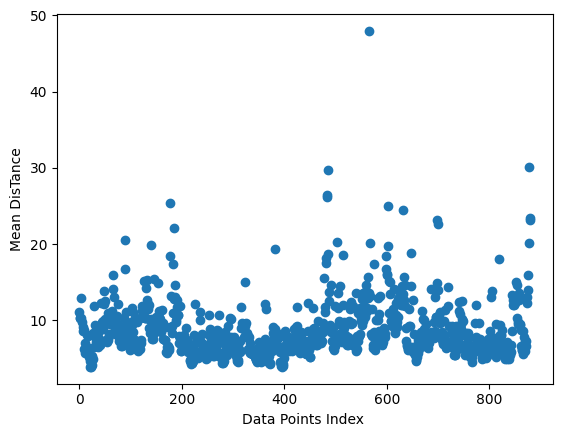

In [29]:
plt.scatter(range(len(meanDistance)), meanDistance)
plt.xlabel("Data Points Index ")
plt.ylabel("Mean DisTance")
plt.show()

In [30]:
outRange = np.where(meanDistance > 9)[0]
outRangeValue = meanDistance[outRange]
outRange

array([  0,   1,   2,   3,   4,   5,   6,  29,  30,  42,  43,  44,  45,
        47,  48,  49,  50,  52,  55,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  70,  73,  75,  76,  87,  88,  89,  90,  91,  92,
        93, 101, 102, 103, 104, 109, 113, 119, 122, 123, 124, 125, 126,
       127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 139, 140,
       142, 146, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158,
       159, 161, 162, 163, 165, 169, 176, 177, 178, 181, 182, 183, 184,
       185, 186, 187, 188, 189, 190, 191, 192, 193, 196, 226, 235, 236,
       252, 273, 290, 294, 295, 316, 317, 319, 323, 324, 325, 362, 365,
       377, 381, 423, 424, 425, 447, 455, 458, 465, 476, 478, 479, 480,
       481, 482, 483, 484, 485, 486, 487, 488, 489, 491, 499, 503, 504,
       505, 506, 507, 508, 514, 515, 516, 517, 527, 528, 529, 530, 531,
       532, 533, 540, 543, 548, 549, 550, 551, 552, 553, 554, 555, 556,
       557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 56

In [31]:
outRangeValue

array([11.05609873, 10.27556536, 10.33367989, 12.8537114 , 10.34734215,
        9.73337559,  9.15041049, 11.89924257,  9.35858624,  9.39683276,
       12.306749  ,  9.81833318,  9.88131795, 12.07124246, 13.82488633,
       12.48756239, 10.10640018,  9.88825277, 10.94341092,  9.47624935,
       10.30897884,  9.43229012, 10.49629302,  9.87470118, 11.16604208,
       14.03308925, 15.88452186, 13.00038947, 10.17312508, 10.29295361,
       10.55306719, 12.17016389,  9.49703345, 10.29005481, 16.69826026,
       20.56944869, 11.03601144,  9.13092559,  9.59307711,  9.1884824 ,
        9.69290495, 11.56230128,  9.31342669, 11.03898824, 10.26500129,
        9.76624193, 10.32614939, 11.87243796, 11.23780088, 10.68571049,
       11.36414239, 15.1694985 , 10.32340461, 10.28195884, 10.27962748,
       14.28169093, 15.29642316, 12.69688954, 11.44183211, 12.11571947,
       11.97925646,  9.01751588,  9.99962099, 19.81359686, 10.15675811,
        9.91409351, 15.43873004,  9.61263084, 10.27323241, 10.44

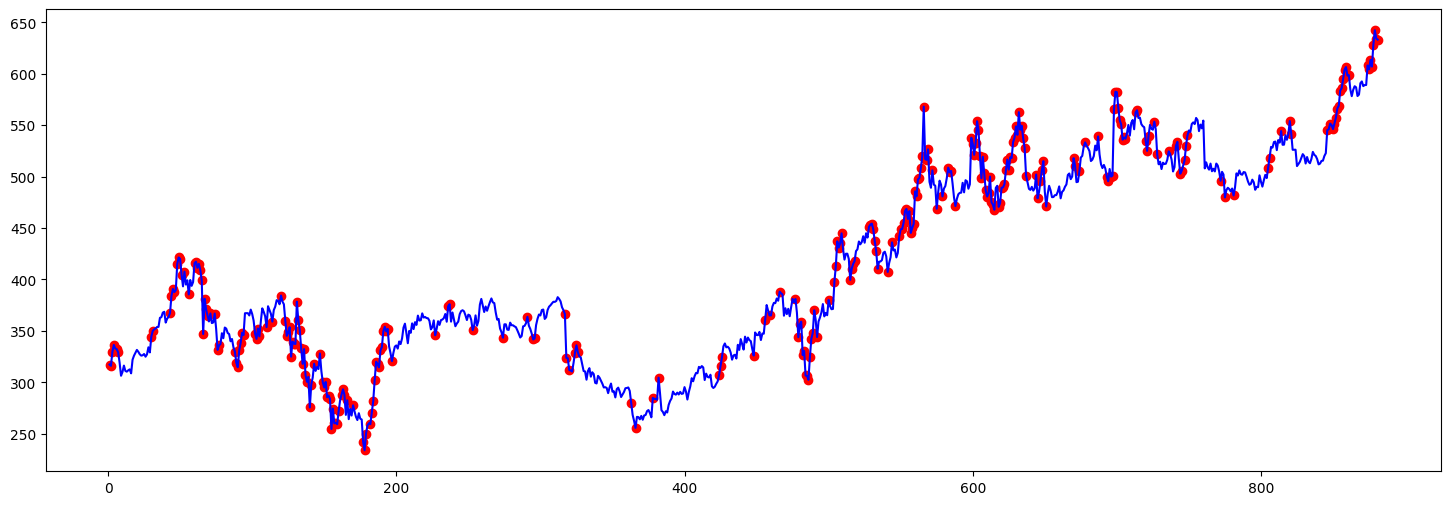

In [41]:
plt.figure(figsize=(18, 6))
plt.plot(trainData['Date'], trainData['Open'], c='blue')
plt.scatter(trainData.iloc[outRange]['Date'], trainData.iloc[outRange]['Open'], c='red')
plt.savefig("网飞.jpg")
plt.show()